In [2]:
import pandas as pd

# 전처리된 데이터 불러오기 (경로 수정)
train_df = pd.read_csv('../preprocessed_data/train_processed.csv')
test_df = pd.read_csv('../preprocessed_data/test_processed.csv')

# 키(cm)를 미터(m)로 변환
train_df['height_m'] = train_df['height'] / 100
test_df['height_m'] = test_df['height'] / 100

# BMI 계산: weight(kg) / height(m)^2
train_df['BMI'] = train_df['weight'] / (train_df['height_m'] ** 2)
test_df['BMI'] = test_df['weight'] / (test_df['height_m'] ** 2)

# 사용한 중간 컬럼 삭제
train_df.drop('height_m', axis=1, inplace=True)
test_df.drop('height_m', axis=1, inplace=True)

# 새로운 파일로 저장
train_df.to_csv('../preprocessed_data/train_processed_with_bmi.csv', index=False)
test_df.to_csv('../preprocessed_data/test_processed_with_bmi.csv', index=False)

print("BMI 파생 변수가 추가된 파일이 'preprocessed_data' 폴더에 성공적으로 저장되었습니다.")

BMI 파생 변수가 추가된 파일이 'preprocessed_data' 폴더에 성공적으로 저장되었습니다.


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# BMI가 추가된 전처리된 데이터 불러오기 (경로 수정)
train_df_bmi = pd.read_csv('../preprocessed_data/train_processed_with_bmi.csv')
test_df_bmi = pd.read_csv('../preprocessed_data/test_processed_with_bmi.csv')

# 피처(X)와 타겟(y) 분리
X_bmi = train_df_bmi.drop(['ID', 'stress_score'], axis=1)
y_bmi = train_df_bmi['stress_score']

# 훈련 데이터와 검증 데이터로 나누기
X_train_bmi, X_val_bmi, y_train_bmi, y_val_bmi = train_test_split(X_bmi, y_bmi, test_size=0.2, random_state=42)

# RandomForestRegressor 모델 초기화 및 학습
model_bmi = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_bmi.fit(X_train_bmi, y_train_bmi.values.ravel())

# 검증 데이터로 예측
y_pred_bmi = model_bmi.predict(X_val_bmi)

# 모델 성능 평가 (RMSE)
rmse_bmi = np.sqrt(mean_squared_error(y_val_bmi, y_pred_bmi))
print(f"BMI 추가 모델의 검증 데이터 RMSE: {rmse_bmi:.4f}")

# 테스트 데이터로 예측
final_predictions_bmi = model_bmi.predict(test_df_bmi.drop('ID', axis=1))

# 제출 파일 생성
submission_df = pd.read_csv('../data/sample_submission.csv')
submission_df['stress_score'] = final_predictions_bmi
submission_df.to_csv('submission_with_bmi.csv', index=False)

print("BMI가 추가된 모델의 제출 파일 'submission_with_bmi.csv'가 성공적으로 생성되었습니다.")

BMI 추가 모델의 검증 데이터 RMSE: 0.2347
BMI가 추가된 모델의 제출 파일 'submission_with_bmi.csv'가 성공적으로 생성되었습니다.


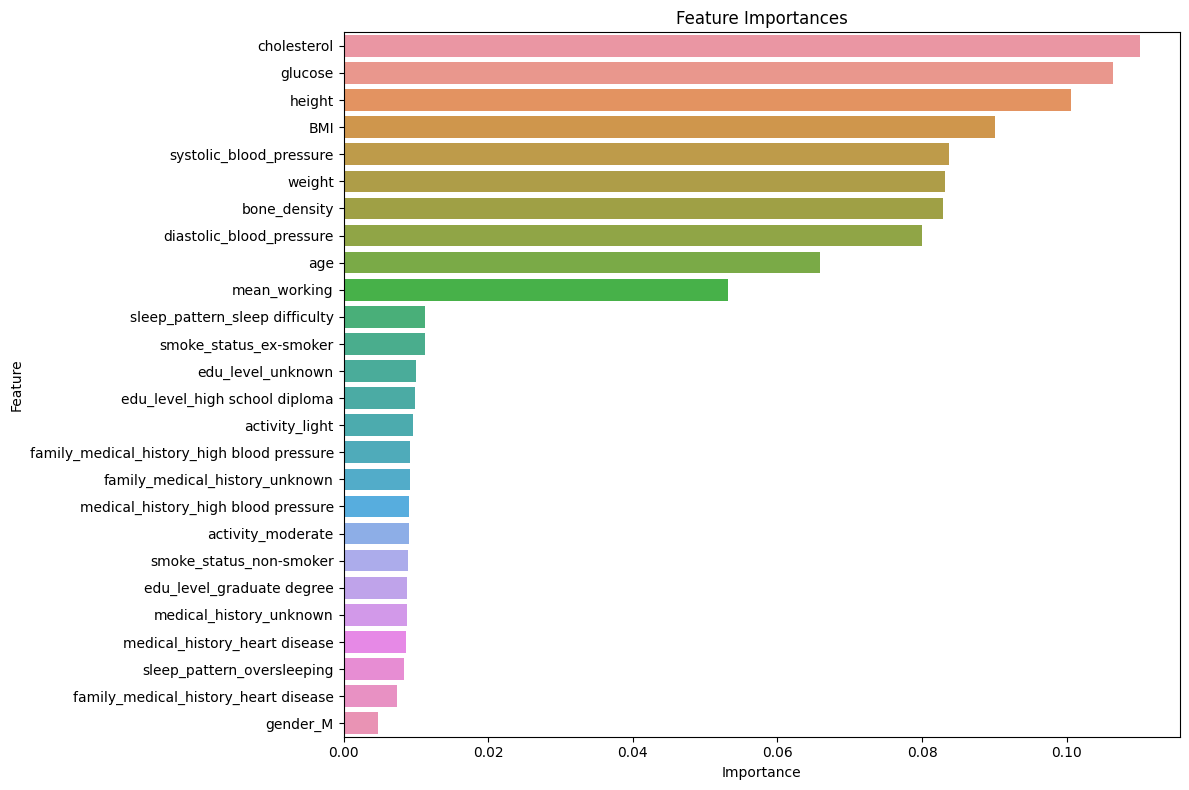

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# BMI가 추가된 데이터 불러오기 (경로 수정)
train_df = pd.read_csv('../preprocessed_data/train_processed_with_bmi.csv')

# 피처(X)와 타겟(y) 분리
X = train_df.drop(['ID', 'stress_score'], axis=1)
y = train_df['stress_score']

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 특성 중요도 추출
feature_importances = model.feature_importances_

# 중요도 순으로 정렬
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=sorted_features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()